In [1]:
# Install Caret package using r-caret dependency in environment.yml file
install.packages("caret")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
# Install ellipse package that is required for multivariate plots
install.packages("ellipse")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [22]:
# Install e1071 Required package for various algorithms 
install.packages("e1071")

also installing the dependency ‘proxy’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [42]:
# Install kernlab Required package for various algorithms
install.packages("kernlab")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [61]:
# Install randomForest Required package for various algorithms
install.packages("randomForest")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [62]:
library(caret)
library(ellipse)
library(e1071)
library(kernlab)
library(randomForest)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




# Loading Dataset

In [63]:
# Load the Iris Dataset through R
# attach the iris dataset to the environment
data(iris)
# rename the dataset
dataset <- iris

In [64]:
# OR Load the Iris Dataset from .csv file
# NOTE: iris.csv gives a NULL output down the line if used for some reason
# define the filename
## filename <- "iris.csv"
# load the CSV file from the local directory
## dataset <- read.csv(filename, header=FALSE)
# set the column names in the dataset
## colnames(dataset) <- c("Sepal.Length","Sepal.Width","Petal.Length","Petal.Width","Species")

# Looking at Dataset Attributes

In [65]:
# create a list of 80% of the rows in the original dataset we can use for training
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)
# select 20% of the data for validation
validation <- dataset[-validation_index,]
# use the remaining 80% of data to training and testing the models
dataset <- dataset[validation_index,]

In [66]:
# Look at the dimmensions of the dataset
dim(dataset)

[1] 120   5

In [67]:
# List types for each attribute
sapply(dataset, class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

In [68]:
# Take a peek at the first 5 rows of the data
head(dataset)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
8,5.0,3.4,1.5,0.2,setosa


In [69]:
# List the levels for the class
levels(dataset$Species)

[1] "setosa"     "versicolor" "virginica"

In [70]:
# Summarize the class distribution
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)

,freq,percentage
setosa,40,33.33333
versicolor,40,33.33333
virginica,40,33.33333


In [71]:
# Summarize attribute distributions
summary(dataset)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width         Species  
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.10   setosa    :40  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.30   versicolor:40  
 Median :5.800   Median :3.000   Median :4.200   Median :1.30   virginica :40  
 Mean   :5.837   Mean   :3.053   Mean   :3.756   Mean   :1.19                  
 3rd Qu.:6.425   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.80                  
 Max.   :7.900   Max.   :4.400   Max.   :6.700   Max.   :2.50                  

# Creating Plots

In [72]:
# Univariate Plot
# Split input and output
x <- dataset[,1:4]
y <- dataset[,5]

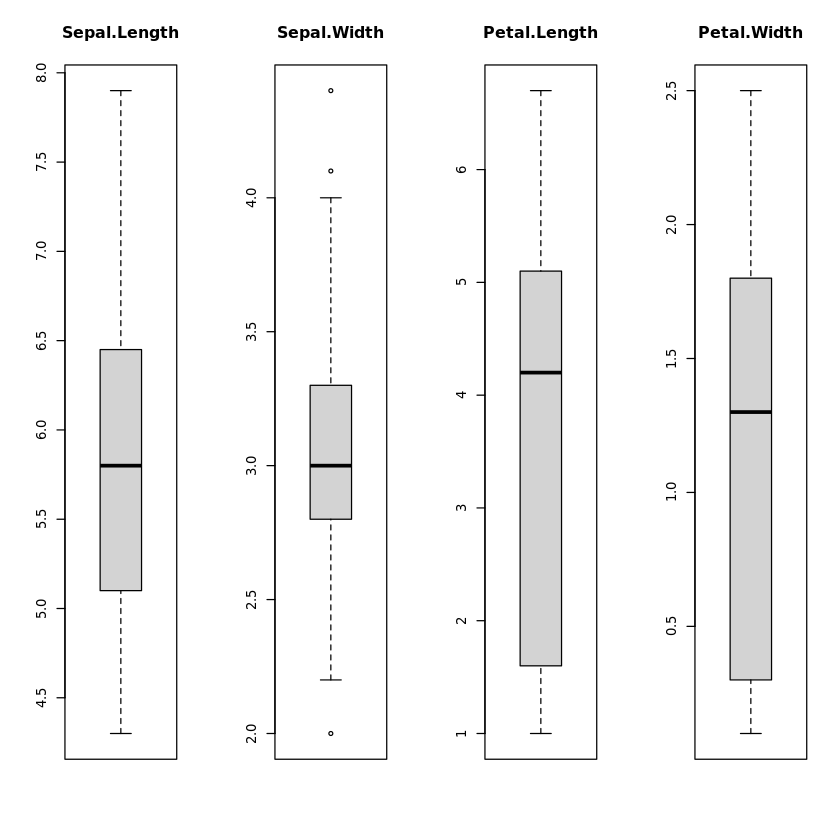

In [73]:
# Boxplot for each attribute on one image
par(mfrow=c(1,4))
  for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
}

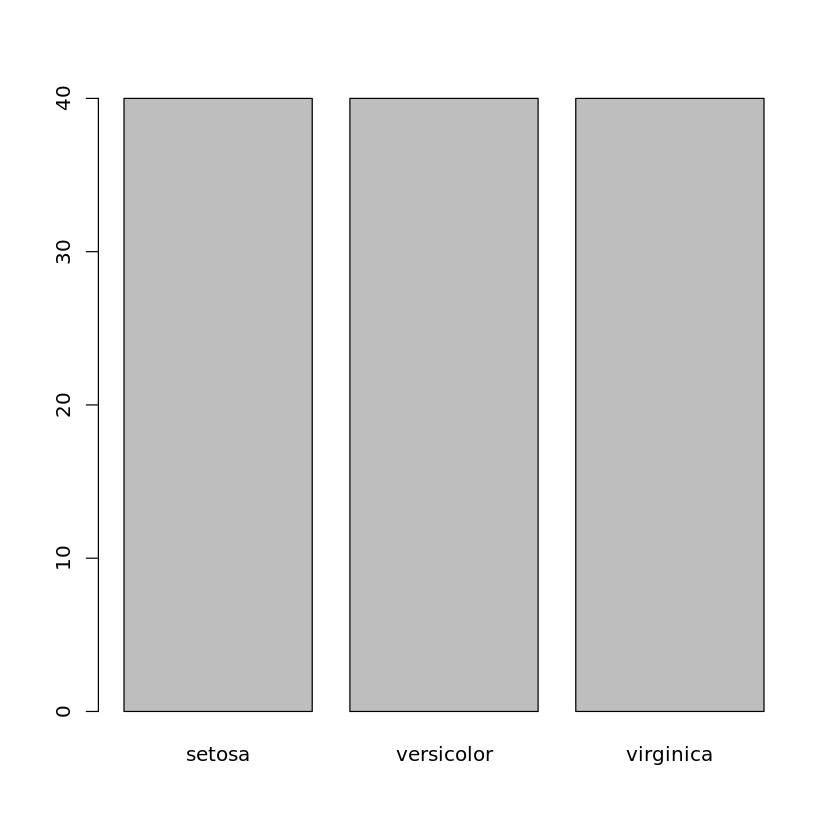

In [74]:
# Barplot for class breakdown
plot(y)

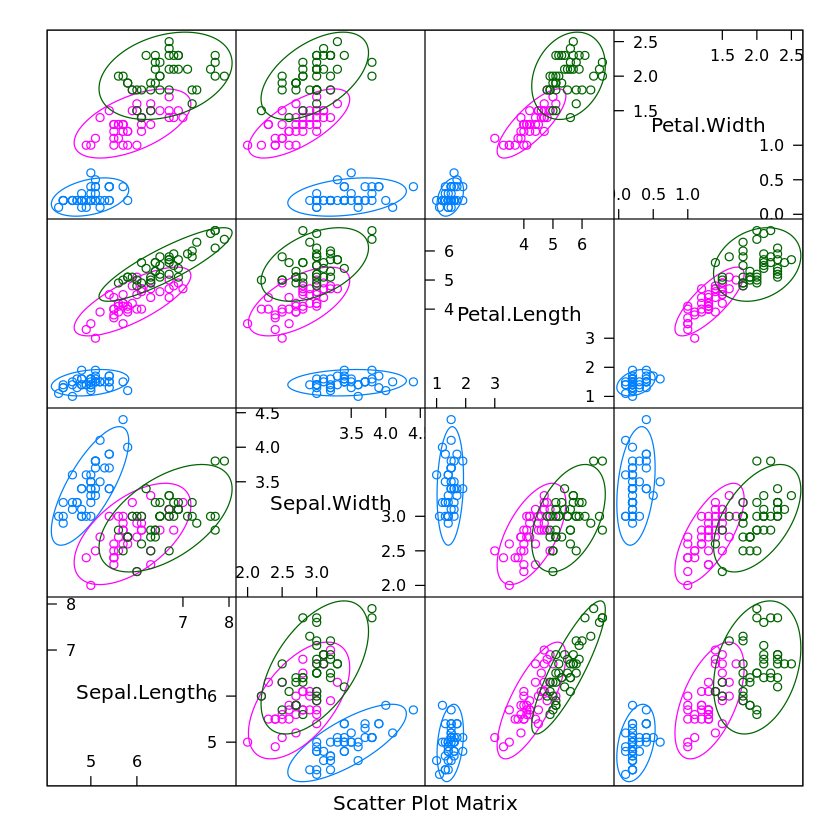

In [75]:
# Multivariate Plots
# scatterplot matrix
featurePlot(x=x, y=y, plot="ellipse")

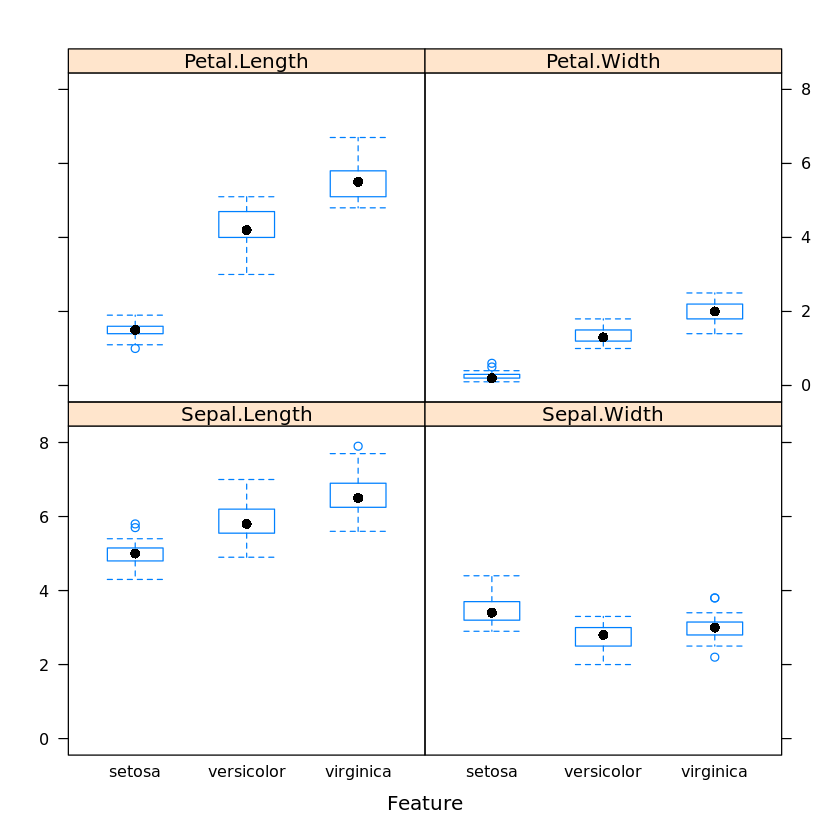

In [76]:
# box and whisker plots for each attribute
featurePlot(x=x, y=y, plot="box")

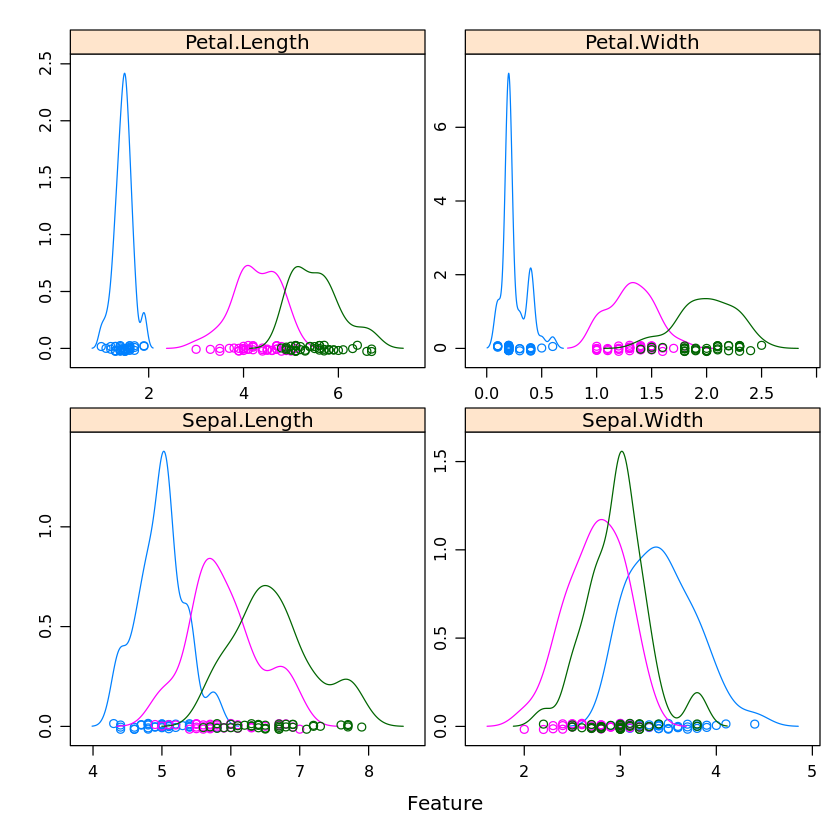

In [77]:
# density plots for each attribute by class value
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

# Evaluating Algorithms

In [78]:
# Run algorithms using 10-fold cross validation
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

In [80]:
# a) linear algorithms
set.seed(7)
fit.lda <- train(Species~., data=dataset, method="lda", metric=metric, trControl=control)
# b) nonlinear algorithms
# CART
set.seed(7)
fit.cart <- train(Species~., data=dataset, method="rpart", metric=metric, trControl=control)
# kNN
set.seed(7)
fit.knn <- train(Species~., data=dataset, method="knn", metric=metric, trControl=control)
# c) advanced algorithms
# SVM
set.seed(7)
fit.svm <- train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)
# Random Forest
set.seed(7)
fit.rf <- train(Species~., data=dataset, method="rf", metric=metric, trControl=control)

# Selecting the best model

In [81]:
# summarize accuracy of models
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu.    Median      Mean   3rd Qu. Max. NA's
lda  0.8333333 1.0000000 1.0000000 0.9750000 1.0000000    1    0
cart 0.8333333 0.8541667 0.9166667 0.9166667 0.9791667    1    0
knn  0.8333333 0.9375000 1.0000000 0.9666667 1.0000000    1    0
svm  0.8333333 0.9166667 0.9583333 0.9500000 1.0000000    1    0
rf   0.8333333 0.9166667 1.0000000 0.9500000 1.0000000    1    0

Kappa 
     Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
lda  0.75 1.00000 1.0000 0.9625 1.00000    1    0
cart 0.75 0.78125 0.8750 0.8750 0.96875    1    0
knn  0.75 0.90625 1.0000 0.9500 1.00000    1    0
svm  0.75 0.87500 0.9375 0.9250 1.00000    1    0
rf   0.75 0.87500 1.0000 0.9250 1.00000    1    0


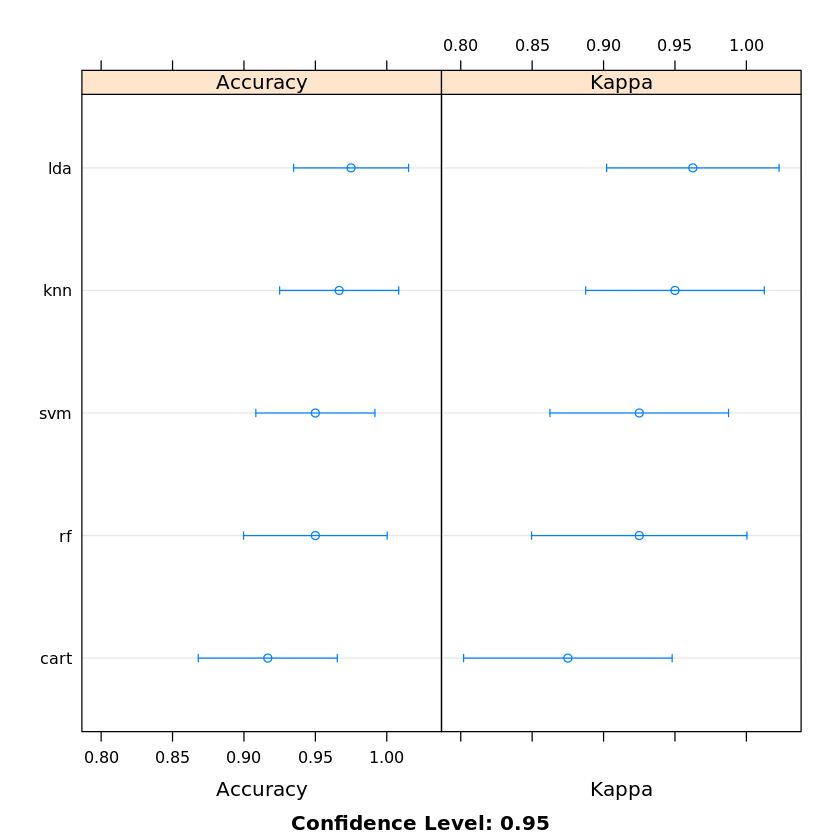

In [82]:
# Compare accuracy of models
dotplot(results)

In [83]:
# summarize Best Model
print(fit.lda)

Linear Discriminant Analysis 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results:

  Accuracy  Kappa 
  0.975     0.9625



# Making Predictions

In [84]:
# Run LDA model directly on the validation set and summarize the results in a confusion matrix
# estimate skill of LDA on the validation dataset
predictions <- predict(fit.lda, validation)
confusionMatrix(predictions, validation$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         10         0
  virginica       0          0        10

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.8843, 1)
    No Information Rate : 0.3333     
    P-Value [Acc > NIR] : 4.857e-15  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           1.0000
Specificity                 1.0000            1.0000           1.0000
Pos Pred Value              1.0000            1.0000           1.0000
Neg Pred Value              1.0000            1.0000           1.0000
Prevalence                  0.3333            